# Scikit-learn 배우기: 파이썬과 기계 학습

## 4장 : 고급 기능 - 속성 엔지니어링(Feature Engineering)과 속성 선택(Feature Selection)

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## pandas을 사용하여 타이타닉 데이터를 임포트한다.

In [3]:
titanic = pd.read_csv('data/titanic.csv')
print titanic

      row.names pclass  survived  \
0             1    1st         1   
1             2    1st         0   
2             3    1st         0   
3             4    1st         0   
4             5    1st         1   
5             6    1st         1   
6             7    1st         1   
7             8    1st         0   
8             9    1st         1   
9            10    1st         0   
10           11    1st         0   
11           12    1st         1   
12           13    1st         1   
13           14    1st         1   
14           15    1st         0   
15           16    1st         1   
16           17    1st         0   
17           18    1st         0   
18           19    1st         1   
19           20    1st         1   
20           21    1st         1   
21           22    1st         0   
22           23    1st         1   
23           24    1st         1   
24           25    1st         1   
25           26    1st         0   
26           27    1st      

In [4]:
print titanic.head()[['pclass', 'survived', 'age', 'embarked', 'boat', 'sex']]

  pclass  survived      age     embarked   boat     sex
0    1st         1  29.0000  Southampton      2  female
1    1st         0   2.0000  Southampton    NaN  female
2    1st         0  30.0000  Southampton  (135)    male
3    1st         0  25.0000  Southampton    NaN  female
4    1st         1   0.9167  Southampton     11    male


In [5]:
titanic.describe()

,row.names,survived,age
count,1313.000000,1313.000000,633.000000
mean,657.000000,0.341965,31.194181
std,379.174762,0.474549,14.747525
min,1.000000,0.000000,0.166700
25%,329.000000,0.000000,21.000000
50%,657.000000,0.000000,30.000000
75%,985.000000,1.000000,41.000000
max,1313.000000,1.000000,71.000000


## 속성 추출(Feature extraction)

_DictVectorizer_을 사용하여 범주적 속성(categorical features)을 1-of-k로 변환한다.


In [6]:
from sklearn import feature_extraction

def one_hot_dataframe(data, cols, replace=False):
    vec = feature_extraction.DictVectorizer()
    mkdict = lambda row: dict((col, row[col]) for col in cols)
    vecData = pd.DataFrame(vec.fit_transform(data[cols].apply(mkdict, axis=1)).toarray())
    vecData.columns = vec.get_feature_names()
    vecData.index = data.index
    if replace:
        data = data.drop(cols, axis=1)
        data = data.join(vecData)
    return (data, vecData)

titanic, titanic_n = one_hot_dataframe(titanic, ['pclass', 'embarked', 'sex'], replace=True)


In [7]:
titanic.describe()

,row.names,survived,age,embarked,embarked=Cherbourg,embarked=Queenstown,embarked=Southampton,pclass=1st,pclass=2nd,pclass=3rd,sex=female,sex=male
count,1313.000000,1313.000000,633.000000,821,1313.000000,1313.000000,1313.000000,1313.000000,1313.000000,1313.000000,1313.000000,1313.000000
mean,657.000000,0.341965,31.194181,0,0.154608,0.034273,0.436405,0.245240,0.213252,0.541508,0.352628,0.647372
std,379.174762,0.474549,14.747525,0,0.361668,0.181998,0.496128,0.430393,0.409760,0.498464,0.477970,0.477970
min,1.000000,0.000000,0.166700,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,329.000000,0.000000,21.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,657.000000,0.000000,30.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,985.000000,1.000000,41.000000,0,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,1313.000000,1.000000,71.000000,0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


'embarked' 속성은 무엇을 가지는가?


In [8]:
print titanic_n.head(5)
print titanic_n[titanic_n['embarked'] != 0].head()

   embarked  embarked=Cherbourg  embarked=Queenstown  embarked=Southampton  \
0         0                   0                    0                     1   
1         0                   0                    0                     1   
2         0                   0                    0                     1   
3         0                   0                    0                     1   
4         0                   0                    0                     1   

   pclass=1st  pclass=2nd  pclass=3rd  sex=female  sex=male  
0           1           0           0           1         0  
1           1           0           0           1         0  
2           1           0           0           0         1  
3           1           0           0           1         0  
4           1           0           0           0         1  
     embarked  embarked=Cherbourg  embarked=Queenstown  embarked=Southampton  \
62        NaN                   0                    0                     0   

남은 범주적 속성도 변환한다.

In [9]:
print titanic.head()
titanic, titanic_n = one_hot_dataframe(titanic, ['home.dest', 'room', 'ticket', 'boat'], replace=True)


   row.names  survived                                             name  \
0          1         1                     Allen, Miss Elisabeth Walton   
1          2         0                      Allison, Miss Helen Loraine   
2          3         0              Allison, Mr Hudson Joshua Creighton   
3          4         0  Allison, Mrs Hudson J.C. (Bessie Waldo Daniels)   
4          5         1                    Allison, Master Hudson Trevor   

       age                        home.dest room      ticket   boat  embarked  \
0  29.0000                     St Louis, MO  B-5  24160 L221      2         0   
1   2.0000  Montreal, PQ / Chesterville, ON  C26         NaN    NaN         0   
2  30.0000  Montreal, PQ / Chesterville, ON  C26         NaN  (135)         0   
3  25.0000  Montreal, PQ / Chesterville, ON  C26         NaN    NaN         0   
4   0.9167  Montreal, PQ / Chesterville, ON  C22         NaN     11         0   

   embarked=Cherbourg  embarked=Queenstown  embarked=Southampt

나이의 결측치에 평균 나이를 부여한다.

In [10]:
print titanic['age'].describe()
mean = titanic['age'].mean()
titanic['age'].fillna(mean, inplace=True)
print titanic['age'].describe()

count    633.000000
mean      31.194181
std       14.747525
min        0.166700
25%       21.000000
50%       30.000000
75%       41.000000
max       71.000000
Name: age, dtype: float64
count    1313.000000
mean       31.194181
std        10.235540
min         0.166700
25%        30.000000
50%        31.194181
75%        31.194181
max        71.000000
Name: age, dtype: float64


0으로 나머지 결측치에 부여한다.


In [11]:
titanic.fillna(0, inplace=True)

In [12]:
print titanic

      row.names  survived                                              name  \
0             1         1                      Allen, Miss Elisabeth Walton   
1             2         0                       Allison, Miss Helen Loraine   
2             3         0               Allison, Mr Hudson Joshua Creighton   
3             4         0   Allison, Mrs Hudson J.C. (Bessie Waldo Daniels)   
4             5         1                     Allison, Master Hudson Trevor   
5             6         1                                Anderson, Mr Harry   
6             7         1                  Andrews, Miss Kornelia Theodosia   
7             8         0                            Andrews, Mr Thomas, jr   
8             9         1      Appleton, Mrs Edward Dale (Charlotte Lamson)   
9            10         0                            Artagaveytia, Mr Ramon   
10           11         0                         Astor, Colonel John Jacob   
11           12         1  Astor, Mrs John Jacob (Ma

훈련 데이터와 테스트 데이터를 만든다.

In [13]:
from sklearn.cross_validation import train_test_split
titanic_target = titanic['survived']
titanic_data = titanic.drop(['name', 'row.names', 'survived'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(titanic_data, titanic_target, test_size=0.25, random_state=33)


In [14]:
from sklearn import tree
dt = tree.DecisionTreeClassifier(criterion='entropy')
dt = dt.fit(X_train, y_train)


In [15]:
import pydot, StringIO
dot_data = StringIO.StringIO()
tree.export_graphviz(dt, out_file=dot_data, feature_names=titanic_data.columns)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
graph.write_png('titanic.png')
from IPython.core.display import Image
Image(filename='titanic.png')

ImportError: No module named pydot

In [19]:
from sklearn import metrics
def measure_performance(X, y, clf, show_accuracy=True, show_classification_report=True, show_confussion_matrix=True):
    y_pred = clf.predict(X)   
    if show_accuracy:
         print "Accuracy:{0:.3f}".format(metrics.accuracy_score(y, y_pred)),"\n"
    if show_classification_report:
        print "Classification report"
        print metrics.classification_report(y, y_pred),"\n"
      
    if show_confussion_matrix:
        print "Confussion matrix"
        print metrics.confusion_matrix(y, y_pred),"\n"

In [20]:
from sklearn import metrics
measure_performance(X_test, y_test, dt, show_confussion_matrix=False, show_classification_report=False)

Accuracy:0.842 



## 속성 선택(Feature Selection)

카이제곱 테스트를 사용하여 가장 중요한 20%만 선택한다.


In [21]:
from sklearn import feature_selection
fs = feature_selection.SelectPercentile(feature_selection.chi2, percentile=20)
X_train_fs = fs.fit_transform(X_train, y_train)
print titanic_data.columns[fs.get_support()]
print fs.scores_[2]
print titanic_data.columns[2]


Index([u'age', u'embarked=Cherbourg', u'embarked=Southampton', u'pclass=1st',
       u'pclass=2nd', u'pclass=3rd', u'sex=female', u'sex=male', u'boat=1',
       u'boat=10',
       ...
       u'room=C-125', u'room=C-7', u'room=D-35', u'ticket=111361 L57 19s 7d',
       u'ticket=13502 L77', u'ticket=17582 L153 9s 3d',
       u'ticket=17608 L262 7s 6d', u'ticket=230136 L39', u'ticket=24160 L221',
       u'ticket=392091'],
      dtype='object', length=115)
41.2650346212
embarked=Cherbourg


새로운 속성으로 성능을 평가한다.


In [22]:
dt.fit(X_train_fs, y_train)
X_test_fs = fs.transform(X_test)
measure_performance(X_test_fs, y_test, dt, show_confussion_matrix=False, show_classification_report=False)

Accuracy:0.836 



훈련 데이터로 교차 검증을 사용하여 최적의 백분위수를 구한다.


Optimal number of features:6 

Mean scores: [ 0.83332303  0.88008658  0.87297464  0.86993403  0.87094414  0.87196454
  0.86280148  0.8638322   0.87194393  0.87602556  0.87296434  0.87398475
  0.87297464  0.87296434  0.86584209  0.86179138  0.86279118  0.86077098
  0.86381159  0.86584209]


C:\Users\chulw\Anaconda2\lib\site-packages\ipykernel\__main__.py:13: DeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future


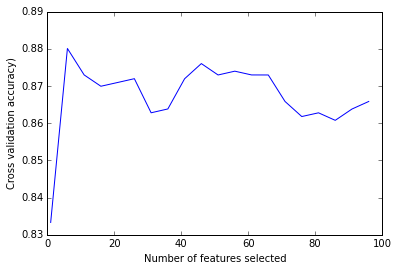

In [23]:
from sklearn import cross_validation

percentiles = range(1, 100, 5)
results = []
for i in range(1, 100, 5):
    fs = feature_selection.SelectPercentile(feature_selection.chi2, percentile=i)
    X_train_fs = fs.fit_transform(X_train, y_train)
    scores = cross_validation.cross_val_score(dt, X_train_fs, y_train, cv=5)
    #print i,scores.mean()
    results = np.append(results, scores.mean())

optimal_percentil = np.where(results == results.max())[0]
print "Optimal number of features:{0}".format(percentiles[optimal_percentil]), "\n"

# 속성의 개수 VS. 교차 검증 점수를 그린다
import pylab as pl
pl.figure()
pl.xlabel("Number of features selected")
pl.ylabel("Cross validation accuracy)")
pl.plot(percentiles,results)
print "Mean scores:",results

테스트 데이터로 속성의 최적 개수를 평가한다.


In [24]:
fs = feature_selection.SelectPercentile(feature_selection.chi2, percentile=percentiles[optimal_percentil])
X_train_fs = fs.fit_transform(X_train, y_train)
dt.fit(X_train_fs, y_train)
X_test_fs = fs.transform(X_test)
measure_performance(X_test_fs, y_test, dt, show_confussion_matrix=False, show_classification_report=False)

Accuracy:0.860 



C:\Users\chulw\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: DeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
  if __name__ == '__main__':


## 모델 선택(Model selection)

In [25]:
print dt.get_params()

{'splitter': 'best', 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'criterion': 'entropy', 'random_state': None, 'max_features': None, 'max_depth': None, 'class_weight': None}


최상의 criterion을 계산한다.

In [26]:
dt = tree.DecisionTreeClassifier(criterion='entropy')
scores = cross_validation.cross_val_score(dt, X_train_fs, y_train, cv=5)
print "Entropy criterion accuracy on cv: {0:.3f}".format(scores.mean())
dt = tree.DecisionTreeClassifier(criterion='gini')
scores = cross_validation.cross_val_score(dt, X_train_fs, y_train, cv=5)
print "Gini criterion accuracy on cv: {0:.3f}".format(scores.mean())



Entropy criterion accuracy on cv: 0.880
Gini criterion accuracy on cv: 0.880


In [27]:
dt.fit(X_train_fs, y_train)
X_test_fs = fs.transform(X_test)
measure_performance(X_test_fs, y_test, dt, show_confussion_matrix=False, show_classification_report=False)

Accuracy:0.863 

